In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import minmax_scale


# generate a single sine wave for a specified time period
def sine_wave_generator(frequency = 5e5, duration = 5e-4, sample_rate = 6e6, amplitude = 1, start_time = 0, end_time = None):
    #Sanity check with timings    
    if duration <= start_time: print("Bad timing! Check start time.")
        
    
#    if start_time == 0:
        
#        x = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
#        frequencies = x * frequency
#        clean_signal = amplitude * np.sin((2 * np.pi) * frequencies)


    if end_time == None:
            end_time = duration
        
    # Filling the bins with zeros before signal starts
    x = np.linspace(0, start_time, int(sample_rate * start_time), endpoint=False)
    frequencies = x * frequency
    clean_signal = 0 * frequencies
      
    # Generating sine wave signal for the signal duration
    y = np.linspace(start_time, duration, int(sample_rate * (end_time-start_time)), endpoint=False)
    frequencies = y * frequency
    clean_signal = np.append(clean_signal, amplitude * np.sin((2 * np.pi) * frequencies))
        
    # Filling the bins with zeros after signal ends
    z = np.linspace(end_time, duration, int(sample_rate * (duration - end_time)), endpoint=False)
    frequencies = z * frequency
    clean_signal = np.append(clean_signal, 0 * frequencies)
          
        
    return clean_signal


# generate white noise 
def noise_generator(duration = 5e-4, amplitude = 1, sample_rate = 6e6, mu = 0, sigma = 0.5):
    #making sure signal and noise have the same dimension
    time_steps = int(sample_rate*duration)
    noise = amplitude * np.random.normal(mu, sigma, time_steps) 

    return noise



In [2]:
# generate a chirp and mixes that with white noise
def signal_generator(frequency = 5e5, duration = 5e-4, sample_rate = 6e6, start_time = 2e-4, end_time = 4.5e-4, signal_amplitude = 0.01, noise_amplitude = 1, mu = 0, sigma = 0.5):
    
    # creating gaussian white noise for the entire duration 
    noise = noise_generator(duration, noise_amplitude, sample_rate, mu, sigma) 

    #Generating desired chirping signal and making sure it has the same dimension as noise
    clean_signal1 = sine_wave_generator(frequency - 2e4, duration, sample_rate, signal_amplitude * 0.6, start_time, end_time)

    
    clean_signal2 = sine_wave_generator(frequency - 1e4, duration, sample_rate, signal_amplitude * 0.8, start_time, end_time)
    

    clean_signal3 = sine_wave_generator(frequency, duration, sample_rate, signal_amplitude, start_time, end_time)
    

    clean_signal4 = sine_wave_generator(frequency + 1e4, duration, sample_rate, signal_amplitude * 0.8, start_time, end_time)
    

    clean_signal5 = sine_wave_generator(frequency + 2e4, duration, sample_rate, signal_amplitude * 0.6, start_time, end_time)
    
    
    clean_signal = clean_signal1 + clean_signal2 + clean_signal3 + clean_signal4 + clean_signal5
    clean_signal = np.resize(clean_signal, noise.shape)    
    
    
    return clean_signal, (clean_signal + noise)



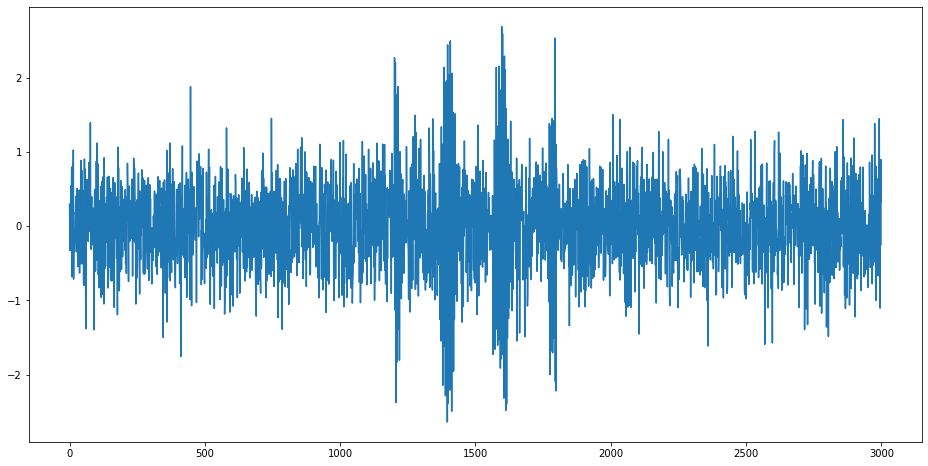

In [32]:

#noise = noise_generator()

_, signal1 = signal_generator(frequency = 4e5, start_time = 1e-4, end_time = 4e-4, signal_amplitude = 0.1)
_, signal2 = signal_generator(frequency = 6e5, start_time = 2e-4, end_time = 3e-4, signal_amplitude = 0.6)
_, signal3 = signal_generator(frequency = 8e5, start_time = 1e-4, signal_amplitude = 0.08)


# Troubleshooting
#import sys
#np.set_printoptions(threshold=sys.maxsize)
#print(signal1)


signal = signal2
figure(figsize=(16, 8))
#plt.plot(noise, label="noise")
plt.plot(signal)
plt.show()


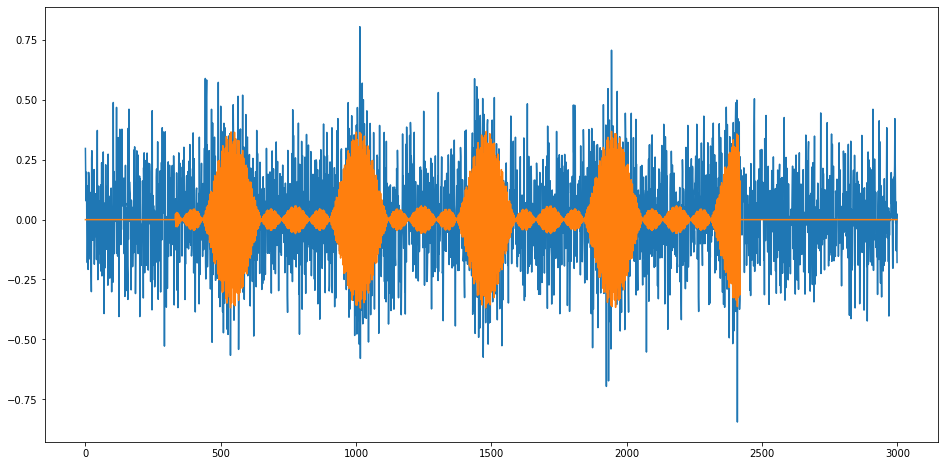

In [37]:
import random


frequency = random.uniform(5e5, 5e7)
start_time = random.uniform(0, 2.5e-4)
end_time = random.uniform(2.6e-4, 5e-4)
signal_amplitude = random.uniform(0.05, 0.1)
noise_amplitude = random.uniform(0.7, 1)
mu = random.uniform(-0.05, 0.05)
sigma = random.uniform(0.1, 0.2)


signal, noisy_signal = signal_generator(frequency = frequency, start_time = start_time, end_time = end_time, signal_amplitude = signal_amplitude, noise_amplitude = noise_amplitude, mu = mu, sigma = sigma)

plt.figure(figsize=(16,8))
plt.plot(noisy_signal)
plt.plot(signal, label = "signal")
plt.show()




[0.37167784 0.04080011 0.04198048 ... 0.05834325 0.0580868  0.03422948]


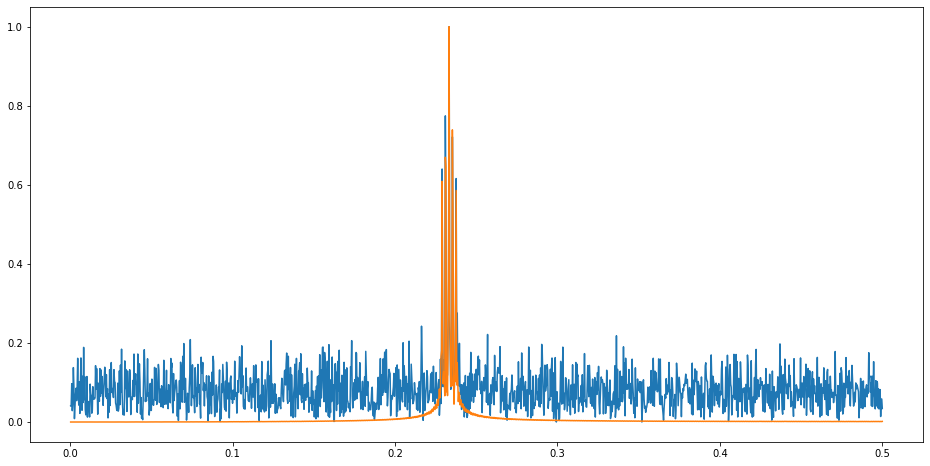

In [38]:
from scipy.fft import rfft, rfftfreq
import scipy
#import pyfftw as fftw

# Number of samples in signal
N = 3000

yf = minmax_scale(np.abs(rfft(noisy_signal)))
xf = rfftfreq(N, 1)

ys = minmax_scale(np.abs(rfft(signal)))
xs = rfftfreq(N, 1)

print(np.abs(yf))
# yt = np.array(0.1)
# fftw.FFTW(signal, yt, axis = None)

plt.figure(figsize=(16,8))
plt.plot(xf[1:], np.abs(yf)[1:])
plt.plot(xs[1:], np.abs(ys)[1:])
#plt.plot(yt)
plt.show()



In [16]:
import pandas as pd

no_of_noisy_signal_windows = 1000
no_of_noise_windows = 1000

noisy_signal_array = [] #np.ndarray(shape=(no_of_noisy_signal_windows,1))
signal_array = [] #np.ndarray(shape=(no_of_noisy_signal_windows,1))


# produces signal with noise background, outputs the burried signal too
for i in range(0, no_of_noisy_signal_windows):
    
    frequency = random.uniform(5e5, 5e7)
    start_time = random.uniform(0, 2.5e-4)
    end_time = random.uniform(2.6e-4, 5e-4)
    signal_amplitude = random.uniform(0.01, 0.05)
    noise_amplitude = random.uniform(0.7, 1)
    mu = random.uniform(-0.05, 0.05)
    sigma = random.uniform(0.1, 0.2)


    signal, noisy_signal = signal_generator(frequency = frequency, start_time = start_time, end_time = end_time, signal_amplitude = signal_amplitude, noise_amplitude = noise_amplitude, mu = mu, sigma = sigma)

    noisy_signal_array = np.append(noisy_signal_array, minmax_scale(np.abs(rfft(noisy_signal))[1:]))
    noisy_signal_array = np.append(noisy_signal_array, 1)
#    signal_array = np.append(signal_array, signal)

# print(noisy_signal_array)
# produces windows of data with only white noise

for j in range(0, no_of_noise_windows):

    amplitude = random.uniform(0.7, 1)
    mu = random.uniform(-0.05, 0.05)
    sigma = random.uniform(0.1, 0.2)
    
    noise = noise_generator(amplitude = amplitude, mu = mu, sigma = sigma)
    
    noisy_signal_array = np.append(noisy_signal_array, minmax_scale(np.abs(rfft(noise))[1:]))
    noisy_signal_array = np.append(noisy_signal_array, 0)
#    signal_array = np.append(signal_array, noise*0)

# Arranging all data points in rows, last column represents the presence (1) or absence (0) of a signal
noisy_signal_array = np.reshape(noisy_signal_array, ((no_of_noisy_signal_windows + no_of_noise_windows),1501))
# import sys
# np.set_printoptions(threshold=sys.maxsize)
#print(noisy_signal_array)    

df = pd.DataFrame(noisy_signal_array)

#print(df)

df.to_csv("timeseries_row_test.csv", header = None, index = None)
    

In [17]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPool1D, Conv1D, Dropout, Flatten, Reshape, ReLU, Embedding, GlobalAveragePooling1D
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [19]:
# load dataset
dataframe = pd.read_csv("timeseries_row_test.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:1500].astype(float)
Y = dataset[:,1500]

print(Y)

[1. 1. 1. ... 0. 0. 0.]


In [39]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
print(encoded_Y)

[1 1 1 ... 0 0 0]


In [22]:

# initial model
def create_baseline():
    # create model
    model = Sequential()
 #   model.add(Embedding(1500000, 60))#, , input_shape=(1500,)))
    model.add(Dense(32, activation='relu', input_shape = (1500,)))
  #  model.add(Reshape((3,400)))
  #  model.add(Conv1D(60, 2, activation='tanh'))
 #   model.add(GlobalAveragePooling1D())
#    model.add(ReLU(threshold= 0.25))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(10, activation='relu'))
   # model.add(Dropout(0.2))
  #  model.add(Dense(10, activation='relu'))
 #   model.add(Conv1D(30, 6, activation = 'relu'))
  #  model.add(MaxPool1D(pool_size=2))
   # model.add(ReLU(threshold= 0.2))
   # model.add(Conv1D(30, 4, activation = 'tanh'))
#    model.add(MaxPool1D(pool_size=2))
#    model.add(ReLU( threshold= 0.3))
 #   model.add(Conv1D(20, 2, activation = 'relu'))
  #  model.add(MaxPool1D(pool_size=2))
   # model.add(ReLU( threshold= 0.4))
  #  model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    # Compile model 
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
  

In [41]:
# evaluate baseline model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_baseline, epochs=10, batch_size=5, verbose=1, validation_split=0.05)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=6, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


AttributeError: ignored

Epoch 1/100
180/180 [==============================] - 1s 3ms/step - loss: 0.6906 - accuracy: 0.5417 - val_loss: 0.6492 - val_accuracy: 0.9950
Epoch 2/100
180/180 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.5906 - val_loss: 0.5717 - val_accuracy: 1.0000
Epoch 3/100
180/180 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.6528 - val_loss: 0.8195 - val_accuracy: 0.0000e+00
Epoch 4/100
180/180 [==============================] - 0s 3ms/step - loss: 0.6450 - accuracy: 0.6528 - val_loss: 0.7991 - val_accuracy: 0.0150
Epoch 5/100
180/180 [==============================] - 0s 2ms/step - loss: 0.6053 - accuracy: 0.7061 - val_loss: 0.9536 - val_accuracy: 0.0100
Epoch 6/100
180/180 [==============================] - 0s 2ms/step - loss: 0.5577 - accuracy: 0.7522 - val_loss: 0.7395 - val_accuracy: 0.3950
Epoch 7/100
180/180 [==============================] - 0s 2ms/step - loss: 0.4751 - accuracy: 0.8211 - val_loss: 0.4525 - val_accuracy: 0.

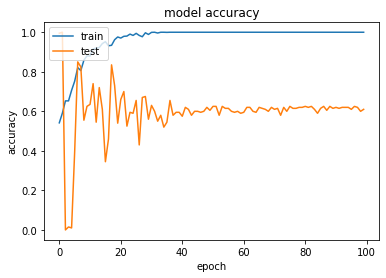

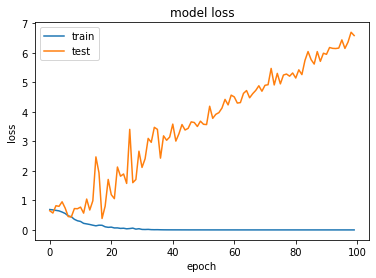

In [48]:
model = create_baseline()
model.save('/content/model/')
history = model.fit(X, Y, validation_split=0.1, epochs=100, batch_size=10, verbose=1)


# history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
####################### FOR TESTING TRAINED NETWORK ############################


noisy_signal_array = []
for i in range(0, 10):
    
    frequency = random.uniform(5e5, 5e7)
    start_time = random.uniform(0, 2.5e-4)
    end_time = random.uniform(2.6e-4, 5e-4)
    signal_amplitude = random.uniform(0.05, 0.1)
    noise_amplitude = random.uniform(0.7, 1)
    mu = random.uniform(-0.05, 0.05)
    sigma = random.uniform(0.1, 0.2)


    signal, noisy_signal = signal_generator(frequency = frequency, start_time = start_time, end_time = end_time, signal_amplitude = signal_amplitude, noise_amplitude = noise_amplitude, mu = mu, sigma = sigma)

    noisy_signal_array = np.append(noisy_signal_array, minmax_scale(np.abs(rfft(noisy_signal))[1:]))
   # noisy_signal_array = np.append(noisy_signal_array)

#resetting noisy signal array to feed noise data only
#noisy_signal_array = []

for j in range(0, 10):

    amplitude = random.uniform(0.7, 1)
    mu = random.uniform(-0.05, 0.05)
    sigma = random.uniform(0.1, 0.2)
    
    noise = noise_generator(amplitude = amplitude, mu = mu, sigma = sigma)
    
    noisy_signal_array = np.append(noisy_signal_array, minmax_scale(np.abs(rfft(noise))[1:]))
#    noisy_signal_array = np.append(noisy_signal_array, 0)


test_signal_array = np.reshape(noisy_signal_array, (20,1500))

test_df = pd.DataFrame(test_signal_array)

#print(test_df)

# converting to np_array for efficient feeding
test_df = test_df.values

In [83]:
# evaluate model with standardized dataset
#estimator = KerasClassifier(model=create_baseline, epochs=100, batch_size=5, verbose=1)
#kfold = StratifiedKFold(n_splits=10, shuffle=True)
#results = cross_val_score(estimator, X, encoded_Y, cv=kfold)
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [26]:
import keras
model = keras.models.load_model('/content/model/')
X_test = test_df[:,0:1500].astype(float)
print(len(X_test[4]))

1500


In [27]:
model.predict([X_test])

1/1 [==============================] - 0s 54ms/step


array([[0.4413137 ],
       [0.43424407],
       [0.46240646],
       [0.392391  ],
       [0.47105753],
       [0.4425621 ],
       [0.43787122],
       [0.45680395],
       [0.4696441 ],
       [0.40729943],
       [0.40196234],
       [0.39487547],
       [0.39696544],
       [0.34939167],
       [0.37344015],
       [0.4138465 ],
       [0.36767134],
       [0.3639203 ],
       [0.34199634],
       [0.3595824 ]], dtype=float32)